In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

In [2]:
#!pip install googletrans

In [3]:
from googletrans import Translator

In [4]:
translator = Translator()

In [5]:
df = pd.read_csv('C:\\Users\\user\\Documents\\Project\\GetSettled-master\\2017_incidents_gestionats_gub.csv')
df.head()

,Codi Incident,Descripció Incident,Codi districte,Nom districte,Codi barri,Nom barri,NK Any,Mes de any,Nom mes,Número d'incidents GUB
0,211,ACCIDENTS DE TRÀNSIT AMB FERITS ...,2,Eixample,5,el Fort Pienc,2017,7,Juliol,26
1,222,INFRACCIONS EN MOVIMENT ...,8,Nou Barris,49,Canyelles,2017,5,Maig,2
2,410,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,1,Ciutat Vella,1,el Raval,2017,5,Maig,278
3,241,SUPORTS ...,3,Sants-Montjuïc,12,la Marina del Prat Vermell,2017,6,Juny,10
4,620,ESTUPEFAENTS / PSICOTROPICS ...,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,6,Juny,7


In [6]:
df.columns

Index(['Codi Incident', 'Descripció Incident', 'Codi districte',
       'Nom districte', 'Codi barri', 'Nom barri', 'NK Any', 'Mes de any',
       'Nom mes', 'Número d'incidents GUB'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34623 entries, 0 to 34622
Data columns (total 10 columns):
Codi Incident             34623 non-null object
Descripció Incident       34623 non-null object
Codi districte            34623 non-null int64
Nom districte             34623 non-null object
Codi barri                34623 non-null int64
Nom barri                 34623 non-null object
NK Any                    34623 non-null int64
Mes de any                34623 non-null int64
Nom mes                   34623 non-null object
Número d'incidents GUB    34623 non-null int64
dtypes: int64(5), object(5)
memory usage: 2.6+ MB


In [8]:
english_columns = [translator.translate(col).text.replace(' ', '_').lower() for col in df.columns]

In [9]:
df.columns = english_columns

In [10]:
df.head()

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents
0,211,ACCIDENTS DE TRÀNSIT AMB FERITS ...,2,Eixample,5,el Fort Pienc,2017,7,Juliol,26
1,222,INFRACCIONS EN MOVIMENT ...,8,Nou Barris,49,Canyelles,2017,5,Maig,2
2,410,ACTIVITATS MOLESTES EN ESPAIS PÚBLICS ...,1,Ciutat Vella,1,el Raval,2017,5,Maig,278
3,241,SUPORTS ...,3,Sants-Montjuïc,12,la Marina del Prat Vermell,2017,6,Juny,10
4,620,ESTUPEFAENTS / PSICOTROPICS ...,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,6,Juny,7


In [11]:
df[df.description_incident == 'URBAN TRIBES']

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents


In [12]:
df1 = df.copy()

In [13]:
df1.description_incident.unique().size

91

In [14]:
df.description_incident = df.description_incident.str.strip()

In [15]:
translate_descriptions = [translator.translate(value, dest='es').text for value in df.description_incident.value_counts().index]
translate_descriptions = [translator.translate(value).text for value in translate_descriptions]

In [16]:
translate_descriptions

['neighborhood coexistence',
 'OTHER ACTIONS OF S, C,',
 'POLICE SURVEILLANCE',
 'ASSISTANCE TO PEOPLE IN PUBLIC SPACES',
 'ANNOYING ACTIVITIES IN PUBLIC SPACES',
 'MOVEMENT INFRACTIONS',
 'TRAFFIC ACCIDENTS WITH WOUNDED',
 'PARKING VIOLATIONS',
 'INFRACTIONS IN VADOS AND RESERVATIONS',
 'INJURED TRAFFIC ACCIDENTS',
 'ACTS AGAINST PRIVATE PROPERTY',
 'COMPANY ANIMALS',
 'OTHER INTERVENTIONS OF P, ADMINISTRATIVE',
 'COLLABORATION WITH OTHER SERVICES',
 'INCIDENTS WITH ROAD AFFECTION',
 'FIRES',
 'SUPPORTS',
 'ASSISTANCE TO PEOPLE IN BUILDING',
 'INCIDENTS WITH TRAFFIC HAZARD',
 'LOCAL INCIDENTS',
 'ATTACKS',
 'AUTOMATED SIGNALS',
 'TRANSFERS OF VEHICLES WITHOUT INFRINGEMENT',
 'TEMPORARY TRAFFIC RESTRICTIONS',
 'PUBLIC SERVICE FAILURES',
 'FIRE / FIRE ALARMS',
 'DOMESTIC VIOLENCE',
 'VANDALISM',
 'NARCOTICS / psychotropic',
 'CONFLICTS IN LOCAL',
 'FIGHTS',
 'SCOPE OF PROTECTION OF THE MINOR',
 'TRAFFIC CONTROLS',
 'ASSISTANCE DRIVERS IN V, P,',
 'MUNICIPAL SERVICES MALFUNCTIONS',
 'ANI

In [17]:
df.isnull().sum()

incident_code              0
description_incident       0
district_code              0
district_name              0
neighborhood_code          0
neighborhood_name          0
nk_any                     0
month_of_year              0
name_my                    0
number_of_gub_incidents    0
dtype: int64

In [18]:
cat_to_en = dict(zip(df.description_incident.value_counts().index.tolist(), translate_descriptions))

In [19]:
cat_to_en

{'CONVIVÈNCIA VEINAL': 'neighborhood coexistence',
 'ALTRES ACTUACIONS DE S, C,': 'OTHER ACTIONS OF S, C,',
 'VIGILÀNCIA POLICIAL': 'POLICE SURVEILLANCE',
 'ASSISTÈNCIA A PERSONES EN ESPAIS PÚBLICS': 'ASSISTANCE TO PEOPLE IN PUBLIC SPACES',
 'ACTIVITATS MOLESTES EN ESPAIS PÚBLICS': 'ANNOYING ACTIVITIES IN PUBLIC SPACES',
 'INFRACCIONS EN MOVIMENT': 'MOVEMENT INFRACTIONS',
 'ACCIDENTS DE TRÀNSIT AMB FERITS': 'TRAFFIC ACCIDENTS WITH WOUNDED',
 'INFRACCIONS PER ESTACIONAMENTS': 'PARKING VIOLATIONS',
 'INFRACCIONS EN GUALS I RESERVES': 'INFRACTIONS IN VADOS AND RESERVATIONS',
 'ACCIDENTS DE TRÀNSIT SENSE FERITS': 'INJURED TRAFFIC ACCIDENTS',
 'ACTES CONTRA LA PROPIETAT PRIVADA': 'ACTS AGAINST PRIVATE PROPERTY',
 'ANIMALS DE COMPANYIA': 'COMPANY ANIMALS',
 'ALTRES INTERVENCIONS DE P, ADMINISTRATIVA': 'OTHER INTERVENTIONS OF P, ADMINISTRATIVE',
 'COL·LABORACIÓ AMB ALTRES SERVEIS': 'COLLABORATION WITH OTHER SERVICES',
 'INCIDÈNCIES AMB AFECTACIÓ DE VIA': 'INCIDENTS WITH ROAD AFFECTION',
 'INC

In [20]:
len(cat_to_en)

91

In [21]:
rev_multidict = {}
for key, value in cat_to_en.items():
    rev_multidict.setdefault(value, set()).add(key)
len(rev_multidict)

90

In [22]:
df.description_incident = df.description_incident.map(cat_to_en)

In [23]:
#results = set()
#df['text'].str.lower().str.split().apply(results.update)
#print(results)

In [24]:
df

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents
0,211,TRAFFIC ACCIDENTS WITH WOUNDED,2,Eixample,5,el Fort Pienc,2017,7,Juliol,26
1,222,MOVEMENT INFRACTIONS,8,Nou Barris,49,Canyelles,2017,5,Maig,2
2,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,1,Ciutat Vella,1,el Raval,2017,5,Maig,278
3,241,SUPPORTS,3,Sants-Montjuïc,12,la Marina del Prat Vermell,2017,6,Juny,10
4,620,NARCOTICS / psychotropic,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,6,Juny,7
5,301,ASSISTANCE TO PEOPLE IN PUBLIC SPACES,2,Eixample,8,l'Antiga Esquerra de l'Eixample,2017,6,Juny,47
6,305,COLLABORATION WITH OTHER SERVICES,7,Horta-Guinardó,34,Can Baró,2017,6,Juny,6
7,610,ACTS AGAINST PRIVATE PROPERTY,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,2017,6,Juny,16
8,221,PARKING VIOLATIONS,7,Horta-Guinardó,35,el Guinardó,2017,7,Juliol,23
9,430,SHOWS IN PUBLIC SPACES,9,Sant Andreu,61,la Sagrera,2017,7,Juliol,6


In [26]:
description_incidents = df.description_incident.value_counts().index.str.lower().str.split().tolist()
type(words)

NameError: name 'words' is not defined

In [28]:
unique_words = set()
for words in description_incidents:
    for word in words:
        unique_words.add(word)

In [27]:
unique_words

{'(recode)',
 '(vehicles)',
 '/',
 '080',
 'accident',
 'accidents',
 'accompaniments',
 'actions',
 'activities',
 'activity',
 'acts',
 'administrative',
 'affection',
 'against',
 'alarms',
 'and',
 'animals',
 'annoying',
 'assistance',
 'attacks',
 'authority',
 'automated',
 'barbecues',
 'basic',
 'beach',
 'building',
 'buildings',
 'by',
 'c,',
 'claims',
 'cme',
 'coexistence',
 'collaboration',
 'col·lboració',
 'coming',
 'communications',
 'company',
 'concentrations',
 'conductions',
 'conflicts',
 'controls',
 'crimes',
 'custody',
 'dangerous',
 'desimmobilitzacions',
 'detainees',
 'discomforts',
 'disposal',
 'domestic',
 'drivers',
 'educational',
 'emergency',
 'environment',
 'explosions',
 'failure',
 'failures',
 'fauna',
 'fights',
 'fire',
 'fires',
 'fishing',
 'flora',
 'fogueres',
 'food',
 'foreigners',
 'freedom',
 'from',
 'generators',
 'hazard',
 'hunting',
 'ice',
 'identifying',
 'illicit',
 'illness',
 'in',
 'incidents',
 'infractions',
 'infringeme

In [29]:
import spacy

In [30]:
nlp = spacy.load("en_core_web_sm")

In [31]:
from spacy.lang.en.stop_words import STOP_WORDS

In [32]:
doc = nlp(unique_words)

TypeError: Argument 'string' has incorrect type (expected str, got set)

In [33]:
def lemmatize(doc):
    return [
        token.lemma_ for token in doc
        if not token.is_punct and not token.is_space
        and (token.text == "US" or not token.lower_ in STOP_WORDS)
        and not token.tag_ == "POS"
    ]

lemmatize(doc)

NameError: name 'doc' is not defined

In [34]:
df1 = df
df1.head()

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents
0,211,TRAFFIC ACCIDENTS WITH WOUNDED,2,Eixample,5,el Fort Pienc,2017,7,Juliol,26
1,222,MOVEMENT INFRACTIONS,8,Nou Barris,49,Canyelles,2017,5,Maig,2
2,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,1,Ciutat Vella,1,el Raval,2017,5,Maig,278
3,241,SUPPORTS,3,Sants-Montjuïc,12,la Marina del Prat Vermell,2017,6,Juny,10
4,620,NARCOTICS / psychotropic,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,6,Juny,7


In [35]:
df1[(df1.description_incident == 'LOCAL INCIDENTS') | (df1.description_incident == 'CONFLICTS IN LOCAL') | (df1.description_incident == 'INFRACTIONS IN LOCAL')]

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents
23,420,LOCAL INCIDENTS,2,Eixample,7,la Dreta de l'Eixample,2017,7,Juliol,45
30,420,LOCAL INCIDENTS,3,Sants-Montjuïc,18,Sants,2017,4,Abril,34
60,420,LOCAL INCIDENTS,9,Sant Andreu,61,la Sagrera,2017,10,Octubre,13
88,420,LOCAL INCIDENTS,7,Horta-Guinardó,43,Horta,2017,10,Octubre,17
141,420,LOCAL INCIDENTS,7,Horta-Guinardó,33,el Baix Guinardó,2017,11,Novembre,12
157,420,LOCAL INCIDENTS,10,Sant Martí,66,el Parc i la Llacuna del Poblenou,2017,10,Octubre,14
179,513,CONFLICTS IN LOCAL,1,Ciutat Vella,2,el Barri Gòtic,2017,11,Novembre,12
187,513,CONFLICTS IN LOCAL,9,Sant Andreu,62,el Congrés i els Indians,2017,8,Agost,2
196,513,CONFLICTS IN LOCAL,9,Sant Andreu,63,Navas,2017,10,Octubre,4
197,420,LOCAL INCIDENTS,9,Sant Andreu,62,el Congrés i els Indians,2017,10,Octubre,6


In [36]:
df1[(df1.description_incident == 'CONFLICTS IN LOCAL') | (df1.description_incident == 'INFRACTIONS IN LOCAL')]

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents
179,513,CONFLICTS IN LOCAL,1,Ciutat Vella,2,el Barri Gòtic,2017,11,Novembre,12
187,513,CONFLICTS IN LOCAL,9,Sant Andreu,62,el Congrés i els Indians,2017,8,Agost,2
196,513,CONFLICTS IN LOCAL,9,Sant Andreu,63,Navas,2017,10,Octubre,4
212,513,CONFLICTS IN LOCAL,8,Nou Barris,53,la Trinitat Nova,2017,1,Gener,1
335,513,CONFLICTS IN LOCAL,7,Horta-Guinardó,35,el Guinardó,2017,3,Març,4
373,513,CONFLICTS IN LOCAL,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,2017,1,Gener,5
402,513,CONFLICTS IN LOCAL,8,Nou Barris,44,Vilapicina i la Torre Llobeta,2017,1,Gener,6
655,513,CONFLICTS IN LOCAL,3,Sants-Montjuïc,11,el Poble-sec,2017,1,Gener,8
712,513,CONFLICTS IN LOCAL,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,2,Febrer,7
834,421,INFRACTIONS IN LOCAL,3,Sants-Montjuïc,15,Hostafrancs,2017,2,Febrer,1


In [37]:
df1[(df1.description_incident == 'CONFLICTS IN LOCAL') | (df1.description_incident == 'INFRACTIONS IN LOCAL')].description_incident = 'LOCAL INCIDENTS'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
df1[(df1.description_incident == 'FIGHTS')| (df1.description_incident == 'ATTACKS')]

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents
172,510,FIGHTS,7,Horta-Guinardó,35,el Guinardó,2017,10,Octubre,1
190,670,ATTACKS,9,Sant Andreu,60,Sant Andreu,2017,10,Octubre,5
224,510,FIGHTS,10,Sant Martí,64,el Camp de l'Arpa del Clot,2017,3,Març,1
282,510,FIGHTS,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,3,Març,5
330,510,FIGHTS,7,Horta-Guinardó,37,el Carmel,2017,1,Gener,4
345,670,ATTACKS,1,Ciutat Vella,2,el Barri Gòtic,2017,1,Gener,17
427,670,ATTACKS,2,Eixample,7,la Dreta de l'Eixample,2017,1,Gener,6
434,670,ATTACKS,5,Sarrià-Sant Gervasi,25,Sant Gervasi - la Bonanova,2017,1,Gener,2
444,670,ATTACKS,2,Eixample,6,la Sagrada Família,2017,3,Març,11
452,670,ATTACKS,5,Sarrià-Sant Gervasi,23,Sarrià,2017,1,Gener,3


In [39]:
df1.loc[(df1.description_incident == 'FIGHTS')].description_incident = 'ATTACKS'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [40]:
df1[(df1.description_incident == 'FIGHTS')]

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents
172,510,FIGHTS,7,Horta-Guinardó,35,el Guinardó,2017,10,Octubre,1
224,510,FIGHTS,10,Sant Martí,64,el Camp de l'Arpa del Clot,2017,3,Març,1
282,510,FIGHTS,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,3,Març,5
330,510,FIGHTS,7,Horta-Guinardó,37,el Carmel,2017,1,Gener,4
618,510,FIGHTS,10,Sant Martí,65,el Clot,2017,1,Gener,2
662,510,FIGHTS,3,Sants-Montjuïc,13,la Marina de Port,2017,1,Gener,2
735,510,FIGHTS,8,Nou Barris,51,Verdun,2017,2,Febrer,3
762,510,FIGHTS,10,Sant Martí,68,el Poblenou,2017,2,Febrer,3
832,510,FIGHTS,3,Sants-Montjuïc,11,el Poble-sec,2017,2,Febrer,5
908,510,FIGHTS,6,Gràcia,30,la Salut,2017,3,Març,1


In [41]:
df1.loc[(df1.description_incident == 'ACTS AGAINST PRIVATE PROPERTY') | (df1.description_incident == 'ACTS AGAINST PUBLIC PROPERTY') | (df1.description_incident == 'ACTS AGAINST THE PROPERTY')].description_incident = 'VANDALISM'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [42]:
df1[(df1.description_incident == 'ACTS AGAINST PRIVATE PROPERTY') | (df1.description_incident == 'ACTS AGAINST PUBLIC PROPERTY') | (df1.description_incident == 'ACTS AGAINST THE PROPERTY')]

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents
7,610,ACTS AGAINST PRIVATE PROPERTY,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,2017,6,Juny,16
25,610,ACTS AGAINST PRIVATE PROPERTY,2,Eixample,7,la Dreta de l'Eixample,2017,7,Juliol,234
62,610,ACTS AGAINST PRIVATE PROPERTY,10,Sant Martí,70,el Besòs i el Maresme,2017,10,Octubre,31
69,610,ACTS AGAINST PRIVATE PROPERTY,2,Eixample,6,la Sagrada Família,2017,10,Octubre,40
74,610,ACTS AGAINST PRIVATE PROPERTY,1,Ciutat Vella,2,el Barri Gòtic,2017,11,Novembre,141
82,610,ACTS AGAINST PRIVATE PROPERTY,1,Ciutat Vella,1,el Raval,2017,9,Setembre,240
101,610,ACTS AGAINST PRIVATE PROPERTY,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,2017,11,Novembre,6
104,610,ACTS AGAINST PRIVATE PROPERTY,8,Nou Barris,53,la Trinitat Nova,2017,10,Octubre,6
153,610,ACTS AGAINST PRIVATE PROPERTY,5,Sarrià-Sant Gervasi,24,les Tres Torres,2017,10,Octubre,2
189,610,ACTS AGAINST PRIVATE PROPERTY,2,Eixample,6,la Sagrada Família,2017,11,Novembre,39


In [43]:
crime_df = pd.read_excel('C:\\Users\\user\\Documents\\Project\\Project_Criminalityfeature.xlsx')
crime_df

,high,medium,low,unknown
0,FIRES,ATTACKS,FIRE / FIRE ALARMS,POLICE SURVEILLANCE
1,EXPLOSIONS,NARCOTICS / psychotropic,ANNOYING ACTIVITIES IN PUBLIC SPACES,"OTHER INTERVENTIONS OF P, ADMINISTRATIVE"
2,DANGEROUS MATTERS,AGAINST SEXUAL FREEDOM,PARKING VIOLATIONS,PUBLIC SERVICE FAILURES
3,TRAFFIC ACCIDENTS WITH PERILLOSSES MATTERS,CRIMES AGAINST PUBLIC ORDER,DOMESTIC VIOLENCE,WASTE DISPOSAL
4,NaN,INCIDENTS WITH PRISONERS AND DETAINEES,OTHER INCIDENTS WITH ANIMALS,NON-AUTOMATED SIGNALS
5,NaN,URBAN TRIBES,FOGUERES / BARBECUES,OTHER ACTIONS IN THE ENVIRONMENT
6,NaN,LOCAL INCIDENTS,DISCOMFORTS BY GENERATORS,Strong winds
7,NaN,VANDALISM,ILLICIT OCCUPATIONS,ACCIDENT COMING FROM CME
8,NaN,TRAFFIC ACCIDENTS WITH WOUNDED,INFRACTIONS OF FOREIGNERS,CONDUCTIONS AND ACCOMPANIMENTS
9,NaN,INJURED TRAFFIC ACCIDENTS,ACTIVITY WITH PRISONERS,INMOVILIZACIONES / DESIMMOBILITZACIONS


In [44]:
df1['crime_risk'] = ''

In [45]:
high = crime_df.high
high = high.dropna()
high

0                                         FIRES
1                                    EXPLOSIONS
2                             DANGEROUS MATTERS
3    TRAFFIC ACCIDENTS WITH PERILLOSSES MATTERS
Name: high, dtype: object

In [46]:
medium = crime_df.medium.dropna()
medium

0                                     ATTACKS
1                    NARCOTICS / psychotropic
2                      AGAINST SEXUAL FREEDOM
3                 CRIMES AGAINST PUBLIC ORDER
4      INCIDENTS WITH PRISONERS AND DETAINEES
5                                URBAN TRIBES
6                             LOCAL INCIDENTS
7                                   VANDALISM
8              TRAFFIC ACCIDENTS WITH WOUNDED
9                   INJURED TRAFFIC ACCIDENTS
10              INCIDENTS WITH TRAFFIC HAZARD
11              INCIDENTS WITH ROAD AFFECTION
12                                   PEDDLING
Name: medium, dtype: object

In [47]:
low = crime_df.low.dropna()
low

0                             FIRE / FIRE ALARMS
1           ANNOYING ACTIVITIES IN PUBLIC SPACES
2                             PARKING VIOLATIONS
3                              DOMESTIC VIOLENCE
4                   OTHER INCIDENTS WITH ANIMALS
5                           FOGUERES / BARBECUES
6                      DISCOMFORTS BY GENERATORS
7                            ILLICIT OCCUPATIONS
8                      INFRACTIONS OF FOREIGNERS
9                        ACTIVITY WITH PRISONERS
10                 AGAINST THE RIGHTS OF WORKERS
11             HUNTING / FISHING / FLORA / FAUNA
12                                       custody
13                                   FOOD CRIMES
14                TEMPORARY TRAFFIC RESTRICTIONS
15                              TRAFFIC CONTROLS
16    TRANSFERS OF VEHICLES WITHOUT INFRINGEMENT
17               MOVEMENT INFRACTIONS (VEHICLES)
18                   ANIMALS / DANGEROUS INSECTS
19                  OCCUPATIONS OF PUBLIC SPACES
Name: low, dtype: ob

In [48]:
df1.loc[ df1['description_incident'] == 'FIRES', 'crime_risk'] = 'high'
df1.loc[ df1['description_incident'] == 'EXPLOSIONS', 'crime_risk'] = 'high'
df1.loc[ df1['description_incident'] == 'DANGEROUS MATTERS', 'crime_risk'] = 'high'
df1.loc[ df1['description_incident'] == 'TRAFFIC ACCIDENTS WITH PERILLOSSES MATTERS', 'crime_risk'] = 'high'

In [49]:
df1.loc[ (df1['description_incident'] == 'ATTACKS') |
        (df1['description_incident'] == 'NARCOTICS / psychotropic') |
        (df1['description_incident'] == 'AGAINST SEXUAL FREEDOM') |
        (df1['description_incident'] == 'CRIMES AGAINST PUBLIC ORDER') |
        (df1['description_incident'] == 'INCIDENTS WITH PRISONERS AND DETAINEES') |
        (df1['description_incident'] == 'URBAN TRIBES') |
        (df1['description_incident'] == 'LOCAL INCIDENTS') |
        (df1['description_incident'] == 'VANDALISM') |
        (df1['description_incident'] == 'TRAFFIC ACCIDENTS WITH WOUNDED') |
        (df1['description_incident'] == 'INJURED TRAFFIC ACCIDENTS') |
        (df1['description_incident'] == 'INCIDENTS WITH TRAFFIC HAZARD') , 'crime_risk'] = 'medium'


In [50]:
df1.loc[(df1['description_incident'] == 'FIRE / FIRE ALARMS') |
(df1['description_incident'] == 'ANNOYING ACTIVITIES IN PUBLIC SPACES') |
(df1['description_incident'] == 'PARKING VIOLATIONS') |
(df1['description_incident'] == 'DOMESTIC VIOLENCE') |          
(df1['description_incident'] == 'OTHER INCIDENTS WITH ANIMALS') |
(df1['description_incident'] == 'FOGUERES / BARBECUES') |
(df1['description_incident'] == 'DISCOMFORTS BY GENERATORS') |
(df1['description_incident'] == 'ILLICIT OCCUPATIONS') |                             
(df1['description_incident'] == 'INFRACTIONS OF FOREIGNERS') |
(df1['description_incident'] == 'ACTIVITY WITH PRISONERS') |
(df1['description_incident'] == 'AGAINST THE RIGHTS OF WORKERS') |
(df1['description_incident'] == 'HUNTING / FISHING / FLORA / FAUNA') |          
(df1['description_incident'] == 'custody') |
(df1['description_incident'] == 'FOOD CRIMES') |
(df1['description_incident'] == 'TEMPORARY TRAFFIC RESTRICTIONS') |
(df1['description_incident'] == 'TRAFFIC CONTROLS') |                              
(df1['description_incident'] == 'TRANSFERS OF VEHICLES WITHOUT INFRINGEMENT') |
(df1['description_incident'] == 'MOVEMENT INFRACTIONS (VEHICLES)'), 'crime_risk'] = 'low'

In [51]:
df1[(df1['description_incident'] == 'FIRE / FIRE ALARMS') |
(df1['description_incident'] == 'ANNOYING ACTIVITIES IN PUBLIC SPACES') |
(df1['description_incident'] == 'PARKING VIOLATIONS') |
(df1['description_incident'] == 'DOMESTIC VIOLENCE') |          
(df1['description_incident'] == 'OTHER INCIDENTS WITH ANIMALS') |
(df1['description_incident'] == 'FOGUERES / BARBECUES') |
(df1['description_incident'] == 'DISCOMFORTS BY GENERATORS') |
(df1['description_incident'] == 'ILLICIT OCCUPATIONS') |                             
(df1['description_incident'] == 'INFRACTIONS OF FOREIGNERS') |
(df1['description_incident'] == 'ACTIVITY WITH PRISONERS') |
(df1['description_incident'] == 'AGAINST THE RIGHTS OF WORKERS') |
(df1['description_incident'] == 'HUNTING / FISHING / FLORA / FAUNA') |          
(df1['description_incident'] == 'custody') |
(df1['description_incident'] == 'FOOD CRIMES') |
(df1['description_incident'] == 'TEMPORARY TRAFFIC RESTRICTIONS') |
(df1['description_incident'] == 'TRAFFIC CONTROLS') |                              
(df1['description_incident'] == 'TRANSFERS OF VEHICLES WITHOUT INFRINGEMENT') |
(df1['description_incident'] == 'MOVEMENT INFRACTIONS (VEHICLES)')].description_incident.count()                 

5695

In [52]:
c=0

In [53]:
for i in range(len(df1)):
    for j in range(len(low)):
        if df1.description_incident[i] == low[j]:
            c+=1
print(c)        

3137


In [54]:
df1.crime_risk

0        medium
1              
2           low
3              
4        medium
5              
6              
7              
8           low
9              
10             
11             
12             
13             
14             
15             
16          low
17             
18          low
19             
20       medium
21             
22          low
23       medium
24          low
25             
26             
27             
28       medium
29          low
          ...  
34593    medium
34594          
34595          
34596    medium
34597          
34598          
34599          
34600          
34601          
34602          
34603          
34604          
34605          
34606          
34607          
34608          
34609          
34610    medium
34611    medium
34612          
34613    medium
34614          
34615       low
34616          
34617          
34618          
34619      high
34620          
34621          
34622          
Name: crime_risk, Length

In [55]:
df1

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents,crime_risk
0,211,TRAFFIC ACCIDENTS WITH WOUNDED,2,Eixample,5,el Fort Pienc,2017,7,Juliol,26,medium
1,222,MOVEMENT INFRACTIONS,8,Nou Barris,49,Canyelles,2017,5,Maig,2,
2,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,1,Ciutat Vella,1,el Raval,2017,5,Maig,278,low
3,241,SUPPORTS,3,Sants-Montjuïc,12,la Marina del Prat Vermell,2017,6,Juny,10,
4,620,NARCOTICS / psychotropic,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,6,Juny,7,medium
5,301,ASSISTANCE TO PEOPLE IN PUBLIC SPACES,2,Eixample,8,l'Antiga Esquerra de l'Eixample,2017,6,Juny,47,
6,305,COLLABORATION WITH OTHER SERVICES,7,Horta-Guinardó,34,Can Baró,2017,6,Juny,6,
7,610,ACTS AGAINST PRIVATE PROPERTY,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,2017,6,Juny,16,
8,221,PARKING VIOLATIONS,7,Horta-Guinardó,35,el Guinardó,2017,7,Juliol,23,low
9,430,SHOWS IN PUBLIC SPACES,9,Sant Andreu,61,la Sagrera,2017,7,Juliol,6,


In [56]:
df1[(df1.crime_risk == 'high') | (df1.crime_risk == 'medium') | (df1.crime_risk == 'low')].crime_risk.count()

12595

using these 12595 observations for the time being

In [57]:
df2 = df1[(df1.crime_risk == 'high') | (df1.crime_risk == 'medium') | (df1.crime_risk == 'low')]
df2.reset_index(inplace=True,drop=True)

In [58]:
df2

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents,crime_risk
0,211,TRAFFIC ACCIDENTS WITH WOUNDED,2,Eixample,5,el Fort Pienc,2017,7,Juliol,26,medium
1,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,1,Ciutat Vella,1,el Raval,2017,5,Maig,278,low
2,620,NARCOTICS / psychotropic,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,6,Juny,7,medium
3,221,PARKING VIOLATIONS,7,Horta-Guinardó,35,el Guinardó,2017,7,Juliol,23,low
4,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2017,9,Setembre,175,low
5,202,TEMPORARY TRAFFIC RESTRICTIONS,10,Sant Martí,73,la Verneda i la Pau,2017,5,Maig,3,low
6,210,INJURED TRAFFIC ACCIDENTS,3,Sants-Montjuïc,12,la Marina del Prat Vermell,2017,3,Març,30,medium
7,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,9,Sant Andreu,63,Navas,2017,6,Juny,29,low
8,420,LOCAL INCIDENTS,2,Eixample,7,la Dreta de l'Eixample,2017,7,Juliol,45,medium
9,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,3,Sants-Montjuïc,11,el Poble-sec,2017,7,Juliol,169,low


In [59]:
print((len(df2[df2.crime_risk == 'low'])/len(df2))*100)
print((len(df2[df2.crime_risk == 'medium'])/len(df2))*100)
print((len(df2[df2.crime_risk == 'high'])/len(df2))*100)

45.216355696705044
46.75664946407305
8.026994839221913


In [60]:
import seaborn as sns
sns.set()

In [61]:
pd.crosstab(df2.district_name,df2.crime_risk)

crime_risk,high,low,medium
district_name,,,
Ciutat Vella,72,412,435
Desconegut,12,83,80
Eixample,108,568,608
Gràcia,66,368,395
Horta-Guinardó,121,750,716
Les Corts,41,264,266
Nou Barris,155,786,806
Sant Andreu,92,517,559
Sant Martí,145,795,898


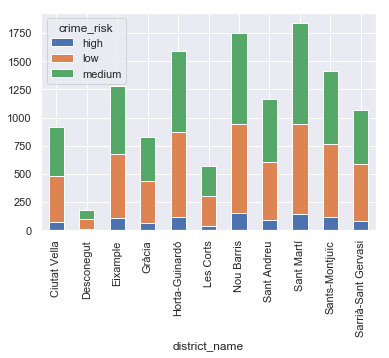

In [62]:
pd.crosstab(df2.district_name,df2.crime_risk).plot.bar(stacked=True);

In [63]:
a = pd.crosstab(df2.neighborhood_name,df2.crime_risk)
a

crime_risk,high,low,medium
neighborhood_name,,,
Baró de Viver,5,35,41
Can Baró,7,48,46
Can Peguera,6,45,23
Canyelles,9,54,56
Ciutat Meridiana,13,65,57
Desconegut,12,83,80
Diagonal Mar i el Front Marítim del Poblenou,13,86,91
Horta,13,97,92
Hostafrancs,14,76,79


In [64]:
pd.crosstab(df2.neighborhood_name,df2.month_of_year)

month_of_year,1,2,3,4,5,6,7,8,9,10,11,12
neighborhood_name,,,,,,,,,,,,
Baró de Viver,9,5,4,6,6,9,7,5,9,7,6,8
Can Baró,10,6,8,8,11,10,8,9,8,7,7,9
Can Peguera,6,8,4,5,5,5,8,7,7,9,5,5
Canyelles,8,11,11,8,9,8,11,11,8,13,10,11
Ciutat Meridiana,13,11,9,11,13,11,13,13,12,12,8,9
Desconegut,13,15,17,15,13,16,16,13,13,15,16,13
Diagonal Mar i el Front Marítim del Poblenou,16,15,13,17,15,19,16,20,16,17,14,12
Horta,17,18,16,16,14,19,18,15,21,19,14,15
Hostafrancs,14,13,17,15,13,15,16,13,13,14,11,15


In [65]:
df2.groupby(by='neighborhood_name')['number_of_gub_incidents'].sum()

neighborhood_name
Baró de Viver                                    199
Can Baró                                         332
Can Peguera                                      198
Canyelles                                        471
Ciutat Meridiana                                 501
Desconegut                                       809
Diagonal Mar i el Front Marítim del Poblenou    1399
Horta                                           1660
Hostafrancs                                     1382
Montbau                                          548
Navas                                            704
Pedralbes                                       1261
Porta                                            903
Provençals del Poblenou                         1028
Sant Andreu                                     2515
Sant Antoni                                     2471
Sant Genís dels Agudells                         570
Sant Gervasi - Galvany                          3622
Sant Gervasi - la Bonanova  

In [66]:
df2[df2.district_name == 'Eixample']

,incident_code,description_incident,district_code,district_name,neighborhood_code,neighborhood_name,nk_any,month_of_year,name_my,number_of_gub_incidents,crime_risk
0,211,TRAFFIC ACCIDENTS WITH WOUNDED,2,Eixample,5,el Fort Pienc,2017,7,Juliol,26,medium
8,420,LOCAL INCIDENTS,2,Eixample,7,la Dreta de l'Eixample,2017,7,Juliol,45,medium
14,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,2,Eixample,9,la Nova Esquerra de l'Eixample,2017,6,Juny,119,low
30,202,TEMPORARY TRAFFIC RESTRICTIONS,2,Eixample,9,la Nova Esquerra de l'Eixample,2017,10,Octubre,10,low
33,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,2,Eixample,6,la Sagrada Família,2017,10,Octubre,50,low
48,221,PARKING VIOLATIONS,2,Eixample,10,Sant Antoni,2017,10,Octubre,25,low
51,230,TRANSFERS OF VEHICLES WITHOUT INFRINGEMENT,2,Eixample,8,l'Antiga Esquerra de l'Eixample,2017,10,Octubre,11,low
59,202,TEMPORARY TRAFFIC RESTRICTIONS,2,Eixample,6,la Sagrada Família,2017,10,Octubre,8,low
68,620,NARCOTICS / psychotropic,2,Eixample,8,l'Antiga Esquerra de l'Eixample,2017,10,Octubre,2,medium
71,410,ANNOYING ACTIVITIES IN PUBLIC SPACES,2,Eixample,5,el Fort Pienc,2017,3,Març,40,low


In [67]:
df2[df2.neighborhood_name == 'Baró de Viver'][['month_of_year','number_of_gub_incidents']].sort_values(by='month_of_year').groupby(by='month_of_year').sum()

,number_of_gub_incidents
month_of_year,
1,17
2,10
3,10
4,12
5,15
6,24
7,23
8,15
9,23


In [68]:
df2[['neighborhood_name','month_of_year','number_of_gub_incidents']].sort_values(by='month_of_year').groupby(by=['neighborhood_name','month_of_year']).sum()

number_of_gub_incidents
neighborhood_name month_of_year                         
Baró de Viver     1                                   17
                  2                                   10
                  3                                   10
                  4                                   12
                  5                                   15
                  6                                   24
                  7                                   23
                  8                                   15
                  9                                   23
                  10                                  16
                  11                                  15
                  12                                  19
Can Baró          1                                   20
                  2                                   17
                  3                                   24
                  4                                   38
                  5                                   36
                  6                                   42
                  7                                   29
                  8                                   32
                  9                                   15
                  10                                  26
                  11                                  25
                  12                                  28
Can Peguera       1                                   19
                  2                                   16
                  3                                   14
                  4                                   17
                  5                                   13
                  6                                   13
...                                                  ...
les Corts         7                                  231
                  8                                  167
                  9                                  220
                  10                                 244
                  11                                 241
                  12                                 203
les Roquetes      1                                   53
                  2                                   48
                  3                                   50
                  4                                   42
                  5                                   63
                  6                                   79
                  7                                   63
                  8                                   57
                  9                                   59
                  10                                  64
                  11                                  49
                  12                                  32
les Tres Torres   1                                   59
                  2                                   67
                  3                                   91
                  4                                   64
                  5                                   86
                  6                                   89
                  7                                   62
                  8                                   20
                  9                                   63
                  10                                  85
                  11                                  63
                  12                                  75

[888 rows x 1 columns]

In [69]:
df2.groupby('month_of_year')['number_of_gub_incidents'].sum()

month_of_year
1      7846
2      7898
3      9176
4      8928
5     10718
6     13344
7     11847
8      9129
9      9931
10    10188
11     8799
12     8127
Name: number_of_gub_incidents, dtype: int64

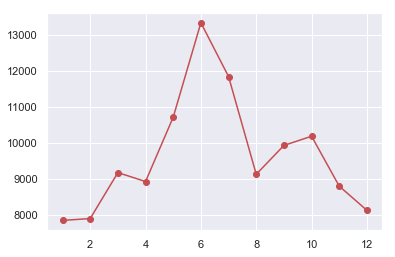

In [70]:
plt.plot(df2.groupby('month_of_year')['number_of_gub_incidents'].sum(),'ro-');

In [71]:
a.head()

crime_risk,high,low,medium
neighborhood_name,,,
Baró de Viver,5,35,41
Can Baró,7,48,46
Can Peguera,6,45,23
Canyelles,9,54,56
Ciutat Meridiana,13,65,57


In [72]:
safety_df = pd.DataFrame(a)
safety_df.head()

crime_risk,high,low,medium
neighborhood_name,,,
Baró de Viver,5,35,41
Can Baró,7,48,46
Can Peguera,6,45,23
Canyelles,9,54,56
Ciutat Meridiana,13,65,57


In [73]:
safety_df['tot_score'] = (safety_df['high'] * 3 ) + (safety_df['medium'] * 2) + (safety_df['low'] * 1)

In [74]:
print(safety_df.sort_values(by='tot_score',ascending=True))

crime_risk                                    high  low  medium  tot_score
neighborhood_name                                                         
Vallbona                                         7   22      22         87
la Clota                                         8   22      24         94
Can Peguera                                      6   45      23        109
Baró de Viver                                    5   35      41        132
Can Baró                                         7   48      46        161
Torre Baró                                      11   53      43        172
el Coll                                          9   45      51        174
Canyelles                                        9   54      56        193
la Teixonera                                     9   55      56        194
la Font de la Guatlla                           11   49      58        198
la Font d'en Fargues                            13   59      50        198
Vallvidrera, el Tibidabo 

In [75]:
#class weight?
#connecting it to area / population?
#what to do with unknown mapping?


In [76]:
population_df = pd.read_csv("C:\\Users\\user\\Documents\\Project\\2018_padro_ocupacio_mitjana.csv")
population_df.rename(columns={'Nom_Barri':'neighborhood_name','Població':'population',
                             'Domicilis':'domicile',
                              'Ocupació mitjana (persones per domicili)':'average population per domicile'},inplace=True)

population_df.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,neighborhood_name,population,domicile,average population per domicile
0,2018,1,Ciutat Vella,1,el Raval,47605,17212,2.77
1,2018,1,Ciutat Vella,2,el Barri Gòtic,17035,6565,2.59
2,2018,1,Ciutat Vella,3,la Barceloneta,14893,6917,2.15
3,2018,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22605,10238,2.21
4,2018,2,Eixample,5,el Fort Pienc,32080,12831,2.50


In [77]:
population_df.loc[[10],['neighborhood_name']] = 'el Poble-sec'
#population_df[population_df.neighborhood_name == 'el Poble Sec'].neighborhood_name = 'el Poble-sec'
#to merge with the safety df

In [78]:
population_df.describe()

,Any,Codi_Districte,Codi_Barri,population,domicile,average population per domicile
count,73.0,73.000000,73.000000,73.000000,73.000000,73.000000
mean,2018.0,6.246575,37.000000,22314.191781,9052.273973,2.512192
std,0.0,2.807633,21.217131,14639.428360,6150.289375,0.182485
min,2018.0,1.000000,1.000000,657.000000,272.000000,2.150000
25%,2018.0,4.000000,19.000000,10622.000000,4234.000000,2.410000
50%,2018.0,7.000000,37.000000,20766.000000,8206.000000,2.460000
75%,2018.0,8.000000,55.000000,30751.000000,12295.000000,2.550000
max,2018.0,10.000000,73.000000,58238.000000,24719.000000,3.000000


In [79]:
safety_df_copy = safety_df.copy()

In [80]:
merged_df = safety_df_copy.merge(population_df,on='neighborhood_name',how = 'left').drop(['Any','Codi_Districte','Nom_Districte','Codi_Barri'],axis=1)

In [81]:
merged_df.head()

,neighborhood_name,high,low,medium,tot_score,population,domicile,average population per domicile
0,Baró de Viver,5,35,41,132,2535.0,977.0,2.59
1,Can Baró,7,48,46,161,9071.0,3832.0,2.37
2,Can Peguera,6,45,23,109,2229.0,925.0,2.41
3,Canyelles,9,54,56,193,6885.0,2808.0,2.45
4,Ciutat Meridiana,13,65,57,218,10622.0,3669.0,2.90


In [82]:
#touristy neighbourhoods- premium .....to be added later update >> population - domicile- avg pop / domicile


##metric to find population

In [83]:
surface_area = pd.read_csv("C:\\Users\\user\\Documents\\Project\\2017_superficie.csv")
surface_area.rename(columns={'Nom_Barri':'neighborhood_name','Superfície (ha)':'surface_area (ha)',
                             'Codi_Barri':'neighborhood_code', 'Nom_Districte':'district_name',
                              'Codi_Districte':'district_code'},inplace=True)
surface_area.loc[[10],['neighborhood_name']] = 'el Poble-sec'
surface_area.head()
#A hectare is a unit of area equal to 10,000 square meters.

,Any,district_code,district_name,neighborhood_code,neighborhood_name,surface_area (ha)
0,2017,1,Ciutat Vella,1,el Raval,109.8
1,2017,1,Ciutat Vella,2,el Barri Gòtic,84.2
2,2017,1,Ciutat Vella,3,la Barceloneta,131.4
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",111.4
4,2017,2,Eixample,5,el Fort Pienc,92.9


In [84]:
#merging the surface area 
merged_df = merged_df.merge(surface_area,on='neighborhood_name',how = 'left').drop(['Any','district_code','district_name','neighborhood_code'],axis=1)

In [85]:
merged_df.isna().sum() #Desconegut - this means unknown

neighborhood_name                  0
high                               0
low                                0
medium                             0
tot_score                          0
population                         1
domicile                           1
average population per domicile    1
surface_area (ha)                  1
dtype: int64

In [86]:
merged_df.dtypes

neighborhood_name                   object
high                                 int64
low                                  int64
medium                               int64
tot_score                            int64
population                         float64
domicile                           float64
average population per domicile    float64
surface_area (ha)                  float64
dtype: object

In [87]:
merged_df.head()

,neighborhood_name,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha)
0,Baró de Viver,5,35,41,132,2535.0,977.0,2.59,23.0
1,Can Baró,7,48,46,161,9071.0,3832.0,2.37,38.4
2,Can Peguera,6,45,23,109,2229.0,925.0,2.41,12.0
3,Canyelles,9,54,56,193,6885.0,2808.0,2.45,79.3
4,Ciutat Meridiana,13,65,57,218,10622.0,3669.0,2.90,35.5


In [88]:
merged_df['population/sa'] = merged_df['population']/merged_df['surface_area (ha)']

In [89]:
merged_df.head()

,neighborhood_name,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha),population/sa
0,Baró de Viver,5,35,41,132,2535.0,977.0,2.59,23.0,110.217391
1,Can Baró,7,48,46,161,9071.0,3832.0,2.37,38.4,236.223958
2,Can Peguera,6,45,23,109,2229.0,925.0,2.41,12.0,185.750000
3,Canyelles,9,54,56,193,6885.0,2808.0,2.45,79.3,86.822194
4,Ciutat Meridiana,13,65,57,218,10622.0,3669.0,2.90,35.5,299.211268


In [90]:
merged_df['overall_score'] = round((merged_df['tot_score'] * merged_df['population/sa'])/100,2)
merged_df.head()

,neighborhood_name,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha),population/sa,overall_score
0,Baró de Viver,5,35,41,132,2535.0,977.0,2.59,23.0,110.217391,145.49
1,Can Baró,7,48,46,161,9071.0,3832.0,2.37,38.4,236.223958,380.32
2,Can Peguera,6,45,23,109,2229.0,925.0,2.41,12.0,185.750000,202.47
3,Canyelles,9,54,56,193,6885.0,2808.0,2.45,79.3,86.822194,167.57
4,Ciutat Meridiana,13,65,57,218,10622.0,3669.0,2.90,35.5,299.211268,652.28


In [91]:
merged_df.sort_values(by='overall_score',ascending=True)

,neighborhood_name,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha),population/sa,overall_score
57,la Marina del Prat Vermell,16,101,63,275,1161.0,462.0,2.51,1428.4,0.812798,2.24
27,"Vallvidrera, el Tibidabo i les Planes",12,71,55,217,4710.0,1605.0,2.93,1152.2,4.087832,8.87
25,Vallbona,7,22,22,87,1400.0,489.0,2.86,59.8,23.411371,20.37
24,Torre Baró,11,53,43,172,2893.0,964.0,3.00,176.8,16.363122,28.14
51,la Clota,8,22,24,94,657.0,272.0,2.42,17.8,36.910112,34.70
9,Montbau,10,77,59,225,5157.0,2139.0,2.41,204.7,25.192965,56.68
16,Sant Genís dels Agudells,12,68,66,236,7149.0,2930.0,2.44,171.6,41.660839,98.32
11,Pedralbes,12,86,76,274,12046.0,4234.0,2.85,270.2,44.581791,122.15
0,Baró de Viver,5,35,41,132,2535.0,977.0,2.59,23.0,110.217391,145.49
3,Canyelles,9,54,56,193,6885.0,2808.0,2.45,79.3,86.822194,167.57


In [103]:
merged_df.to_csv("C:\\Users\\user\\Documents\\Project\\merged.csv")

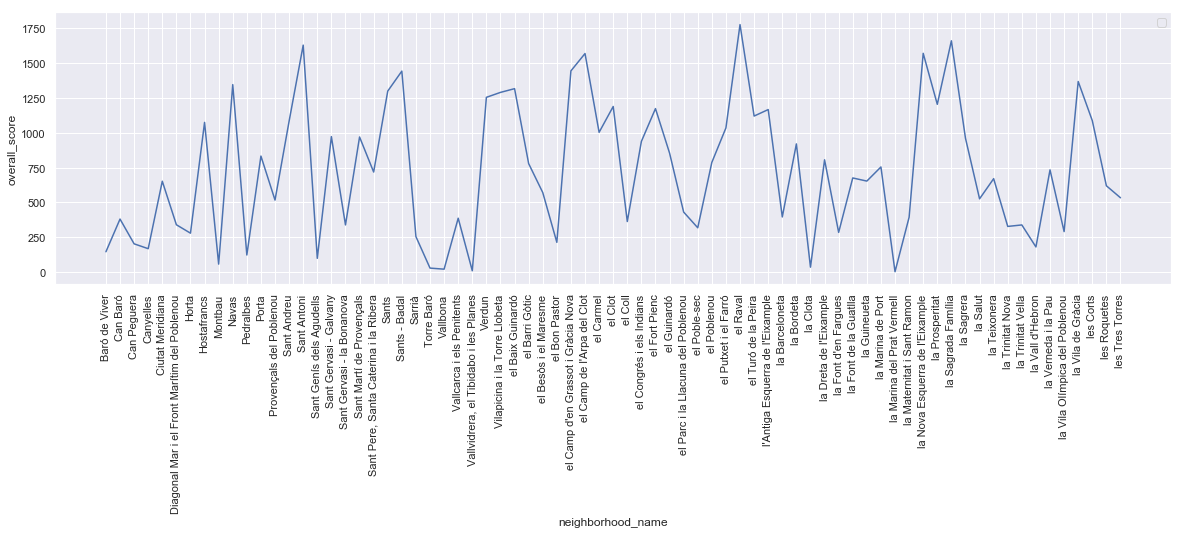

In [93]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set(xlabel='neighborhood_name', ylabel='count')
ax.legend(labels=["overall score scount"])
sns.lineplot(ax = ax, x = 'neighborhood_name', y = 'overall_score', data = merged_df.dropna())
plt.xticks(rotation=90);


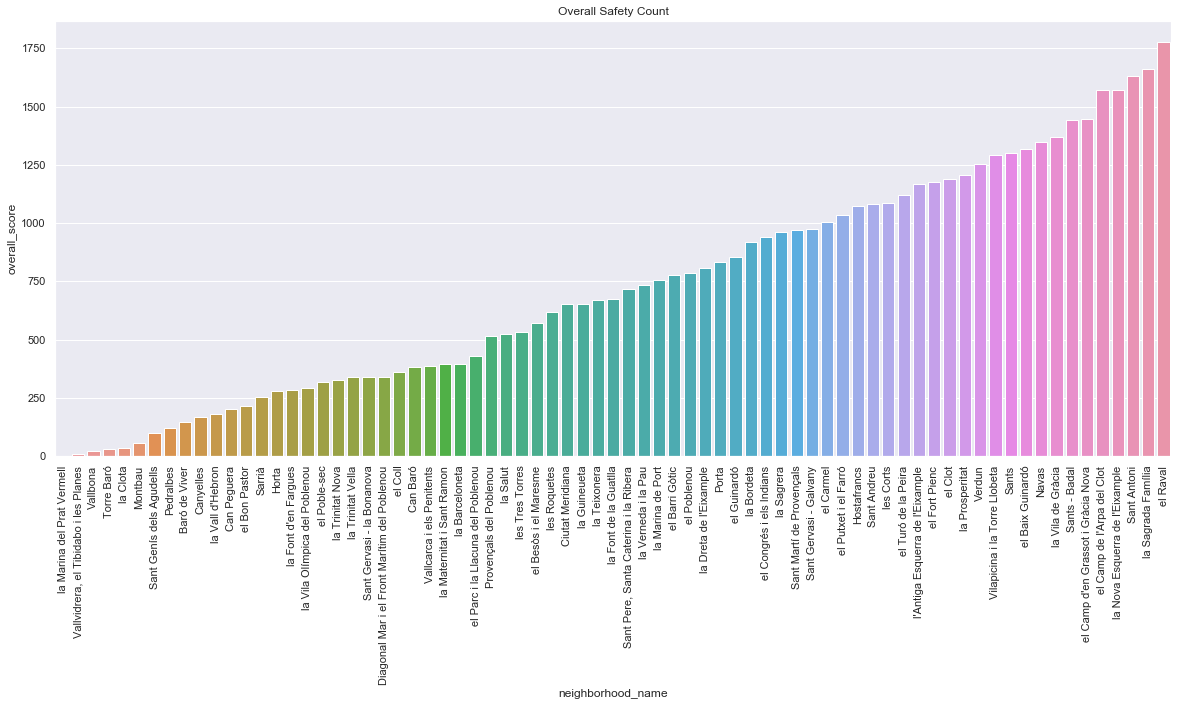

In [94]:
fig,ax = plt.subplots(figsize=(20,8))
ax.set(xlabel='neighborhood_name', ylabel='count')
ax.set_title("Overall Safety Count")
sns.barplot(ax = ax, x = 'neighborhood_name', y = 'overall_score', data = merged_df.sort_values(by='overall_score'
                                                                                                ,ascending=True).dropna())
plt.xticks(rotation=90)
plt.savefig("C:\\Users\\user\\Documents\\Project\\overall_safety_barrios.jpg",frameon=True);

In [96]:
#find z score for overall score - to normalize it further - standard deviations over mean score
merged_df.overall_score.mean()

725.5449315068493

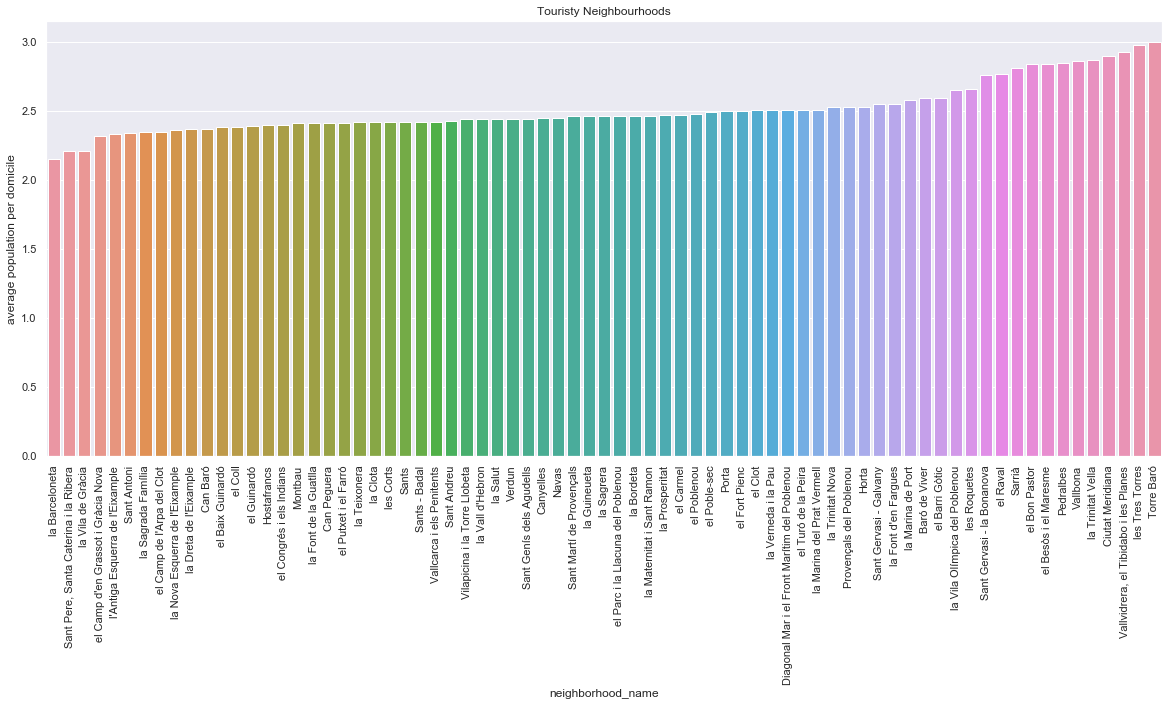

In [95]:
#to find the not so touristy neighborhoods
fig,ax = plt.subplots(figsize=(20,8))
ax.set(xlabel='neighborhood_name', ylabel='count')
ax.set_title("Touristy Neighbourhoods")
with sns.axes_style("dark"):
    sns.barplot(ax = ax, x = 'neighborhood_name', y = 'average population per domicile', data = merged_df.sort_values(by='average population per domicile'
                                                                                                            ,ascending=True).dropna(),orient = "v")
plt.xticks(rotation=90)
plt.savefig("C:\\Users\\user\\Documents\\Project\\Touristy Neighbourhoods.jpg",frameon=True);

#Should we consider less than 2.5 score as not touristy?(can these be defined as quite barrios?)

In [97]:
merged_df['zscore'] = (merged_df.overall_score - merged_df.overall_score.mean())/merged_df.overall_score.std(ddof=0)

merged_df.head()

,neighborhood_name,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha),population/sa,overall_score,zscore
0,Baró de Viver,5,35,41,132,2535.0,977.0,2.59,23.0,110.217391,145.49,-1.209101
1,Can Baró,7,48,46,161,9071.0,3832.0,2.37,38.4,236.223958,380.32,-0.719608
2,Can Peguera,6,45,23,109,2229.0,925.0,2.41,12.0,185.750000,202.47,-1.090329
3,Canyelles,9,54,56,193,6885.0,2808.0,2.45,79.3,86.822194,167.57,-1.163077
4,Ciutat Meridiana,13,65,57,218,10622.0,3669.0,2.90,35.5,299.211268,652.28,-0.152718


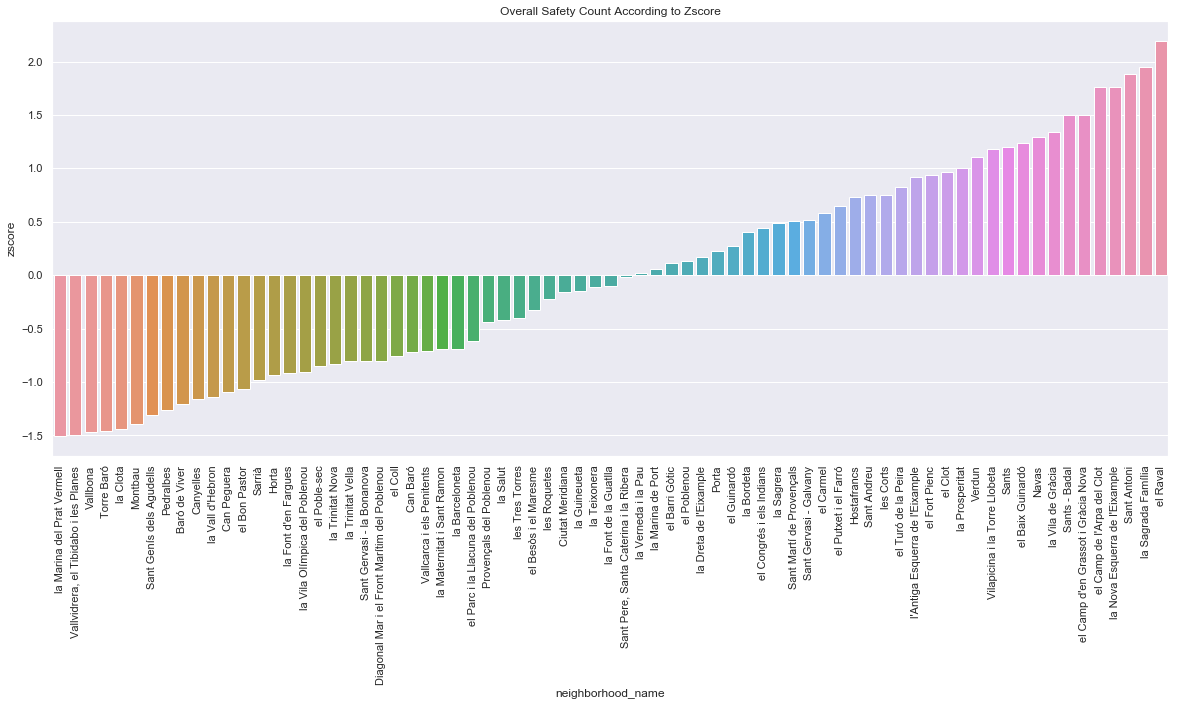

In [101]:
fig,ax = plt.subplots(figsize=(20,8))
ax.set(xlabel='neighborhood_name', ylabel='count')
ax.set_title("Overall Safety Count According to Zscore")
sns.barplot(ax = ax, x = 'neighborhood_name', y = 'zscore', data = merged_df.sort_values(by='zscore'
                                                                                                ,ascending=True).dropna())
plt.xticks(rotation=90)
plt.savefig("C:\\Users\\user\\Documents\\Project\\Overall Safety Count According to Zscore.jpg",frameon=True);

#negative values extremely safe?